# Analyze of Data

### Loading dataset from a csv file

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

%matplotlib inline
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

astro_data = pd.read_csv('astro.csv', parse_dates=True, sep=';')
astro_data.head()

,Surname,Given names,Nation,Flights,time_in_space,sex_or_genderLabel,birth,death,age
0,Padalka,Gennadi Ivanovich,USSR,5,1265009,male,21.6.1958,NaN,NaN
1,Malenchenko,Yuri Ivanovich,USSR,6,1191440,male,22.12.1961,NaN,NaN
2,Krikalev,Sergei Konstantinovich,USSR,6,1156898,male,27.8.1958,NaN,NaN
3,Kaleri,Aleksandr Yuriyevich,USSR,5,1107753,male,13.5.1956,NaN,NaN
4,Avdeyev,Sergei Vasiliyevich,USSR,3,1076531,male,1.1.1956,NaN,NaN


In [124]:
astro_data.describe()

,Flights,time_in_space,age
count,559.000000,5.590000e+02,101.000000
mean,2.262970,1.392442e+05,64.633663
std,1.284275,2.125885e+05,15.716057
min,1.000000,1.060000e+02,34.000000
25%,1.000000,1.791250e+04,51.000000
50%,2.000000,4.014800e+04,67.000000
75%,3.000000,2.138645e+05,77.000000
max,7.000000,1.265009e+06,95.000000


In [148]:
astro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 9 columns):
Surname               559 non-null object
Given names           559 non-null object
Nation                559 non-null object
Flights               559 non-null int64
time_in_space         559 non-null int64
sex_or_genderLabel    559 non-null object
birth                 559 non-null object
death                 101 non-null object
age                   101 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 39.4+ KB


### Grouping data by gender

#### Count data by gender

In [2]:
gender_data_count=astro_data.groupby('sex_or_genderLabel').count().reset_index()
gender_data_count

,sex_or_genderLabel,Surname,Given names,Nation,Flights,time_in_space,birth,death,age
0,female,61,61,61,61,61,61,5,5
1,male,497,497,497,497,497,497,96,96
2,transgender female,1,1,1,1,1,1,0,0


In [3]:
total=gender_data_count['Surname'].sum()
male=gender_data_count.loc[1,'Surname']
female=gender_data_count.loc[0,'Surname']
other=gender_data_count.loc[2,'Surname']

print(f"""male astronauts are {male} or {(male/total)*100:.2f}% from the total {total}
female astronauts are {female} or {(female/total)*100:.2f}% from the total {total}
other astronauts are {other} or {(other/total)*100:.2f}% from the total {total}""")

male astronauts are 497 or 88.91% from the total 559
female astronauts are 61 or 10.91% from the total 559
other astronauts are 1 or 0.18% from the total 559


Text(0, 0.5, 'Surname')

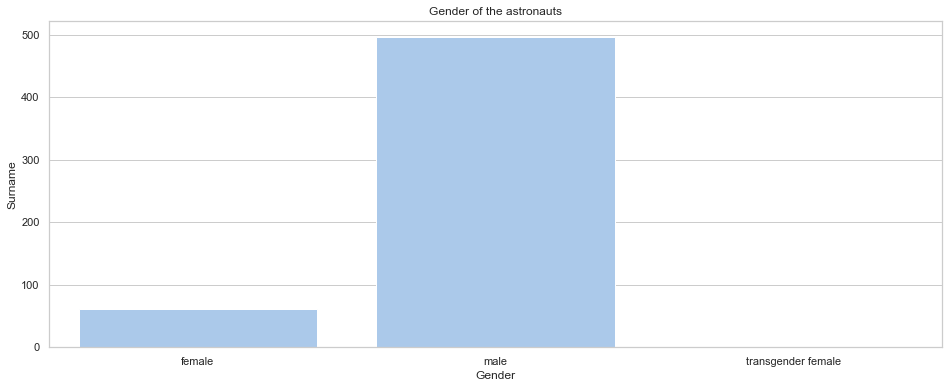

In [4]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='sex_or_genderLabel', y='Surname', data=gender_data_count, color="b", ci=None)

ax.set_title('Gender of the astronauts')
ax.set_xlabel('Gender')
ax.set_ylabel('Surname')

#### Sum data by gender

In [5]:
gender_data_sum=astro_data.groupby('sex_or_genderLabel').sum().reset_index()
gender_data_sum

,sex_or_genderLabel,Flights,time_in_space,age
0,female,139,6599442,237.0
1,male,1125,71226561,6291.0
2,transgender female,1,11504,0.0


### Flights by gender

Text(0, 0.5, 'Flights')

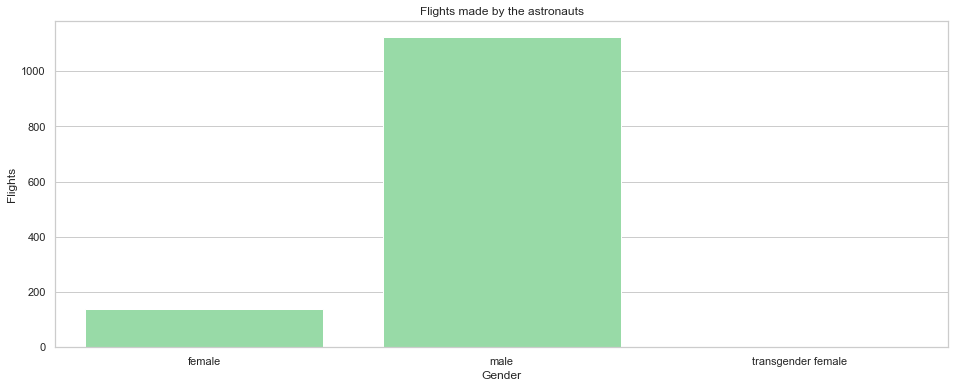

In [6]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='sex_or_genderLabel', y='Flights', data=gender_data_sum, color="g", ci=None)

ax.set_title('Flights made by the astronauts')
ax.set_xlabel('Gender')
ax.set_ylabel('Flights')

### Time in space by gender

Text(0, 0.5, 'Time')

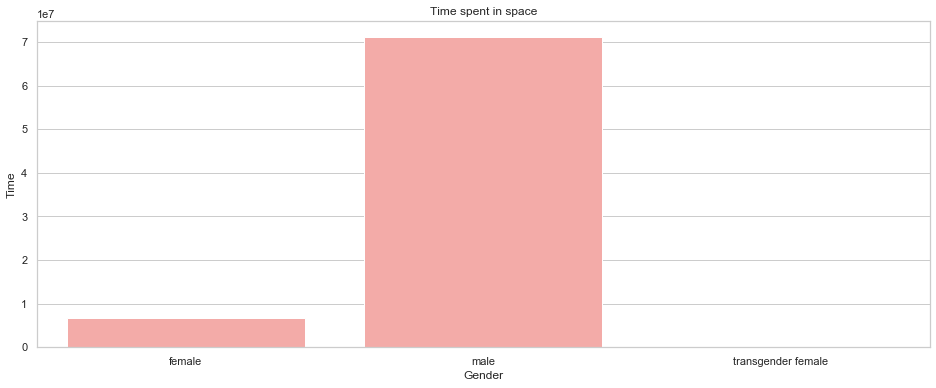

In [7]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='sex_or_genderLabel', y='time_in_space', data=gender_data_sum, color="r", ci=None)

ax.set_title('Time spent in space')
ax.set_xlabel('Gender')
ax.set_ylabel('Time')

In [8]:
country_data_sum=astro_data.groupby('Nation').sum().reset_index()
country_data_flights=country_data_sum.loc[country_data_sum['Flights'] > 5]
country_data_time=country_data_sum.loc[country_data_sum['time_in_space'] > 100000]
# country_data_sum

Text(0, 0.5, 'Flights')

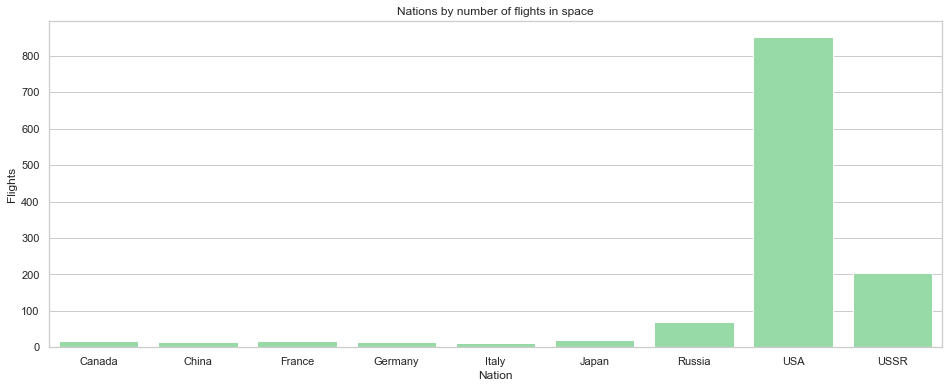

In [9]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='Nation', y='Flights', data=country_data_flights, color="g", ci=None)

ax.set_title('Nations by number of flights in space')
ax.set_xlabel('Nation')
ax.set_ylabel('Flights')

Text(0, 0.5, 'Time in space (s)')

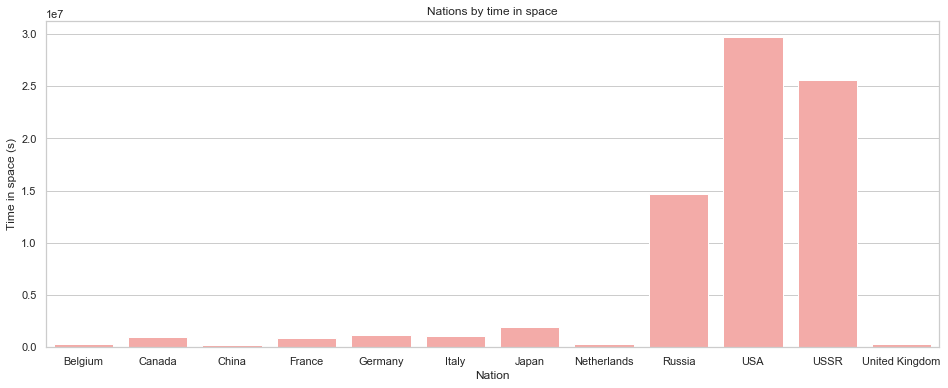

In [10]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='Nation', y='time_in_space', data=country_data_time, color="r", ci=None)

ax.set_title('Nations by time in space')
ax.set_xlabel('Nation')
ax.set_ylabel('Time in space (s)')

### Splite birthday column to three columns

In [11]:
for i in range(astro_data.shape[0]):
    try:
        matches = re.match(r"(\d+)\.(\d+)\.(\d{4})", astro_data.loc[i,'birth'])
        astro_data.loc[i,'Day']=int(matches[1])
        astro_data.loc[i,'Month']=int(matches[2])
        astro_data.loc[i,'Year']=int(matches[3])
    except:
        pass

astro_data[['Day', 'Month', 'Year']] = astro_data[['Day', 'Month', 'Year']].astype('int32')
astro_data.head()

,Surname,Given names,Nation,Flights,time_in_space,sex_or_genderLabel,birth,death,age,Day,Month,Year
0,Padalka,Gennadi Ivanovich,USSR,5,1265009,male,21.6.1958,NaN,NaN,21,6,1958
1,Malenchenko,Yuri Ivanovich,USSR,6,1191440,male,22.12.1961,NaN,NaN,22,12,1961
2,Krikalev,Sergei Konstantinovich,USSR,6,1156898,male,27.8.1958,NaN,NaN,27,8,1958
3,Kaleri,Aleksandr Yuriyevich,USSR,5,1107753,male,13.5.1956,NaN,NaN,13,5,1956
4,Avdeyev,Sergei Vasiliyevich,USSR,3,1076531,male,1.1.1956,NaN,NaN,1,1,1956


### Make a new column with the zodiac sign

In [12]:
for i in range(astro_data.shape[0]):
    if astro_data.loc[i,'Month']==1:
        if astro_data.loc[i,'Day']>=21:
            astro_data.loc[i,'SignLabel']='Aquarius'
            astro_data.loc[i,'SignN']=11
        else:
            astro_data.loc[i,'SignLabel']='Capricorn'
            astro_data.loc[i,'SignN']=10

    elif astro_data.loc[i,'Month']==2:
        if astro_data.loc[i,'Day']>=20:
            astro_data.loc[i,'SignLabel']='Pisces'
            astro_data.loc[i,'SignN']=12
        else:
            astro_data.loc[i,'SignLabel']='Aquarius'
            astro_data.loc[i,'SignN']=11

    elif astro_data.loc[i,'Month']==3:
        if astro_data.loc[i,'Day']>=21:
            astro_data.loc[i,'SignLabel']='Aries'
            astro_data.loc[i,'SignN']=1
        else:
            astro_data.loc[i,'SignLabel']='Pisces'
            astro_data.loc[i,'SignN']=12

    elif astro_data.loc[i,'Month']==4:
        if astro_data.loc[i,'Day']>=21:
            astro_data.loc[i,'SignLabel']='Taurus'
            astro_data.loc[i,'SignN']=2
        else:
            astro_data.loc[i,'SignLabel']='Aries'
            astro_data.loc[i,'SignN']=1

    elif astro_data.loc[i,'Month']==5:
        if astro_data.loc[i,'Day']>=22:
            astro_data.loc[i,'SignLabel']='Gemini'
            astro_data.loc[i,'SignN']=3
        else:
            astro_data.loc[i,'SignLabel']='Taurus'
            astro_data.loc[i,'SignN']=2
            
    elif astro_data.loc[i,'Month']==6:
        if astro_data.loc[i,'Day']>=22:
            astro_data.loc[i,'SignLabel']='Cancer'
            astro_data.loc[i,'SignN']=4
        else:
            astro_data.loc[i,'SignLabel']='Gemini'
            astro_data.loc[i,'SignN']=3
            
    elif astro_data.loc[i,'Month']==7:
        if astro_data.loc[i,'Day']>=23:
            astro_data.loc[i,'SignLabel']='Leo'
            astro_data.loc[i,'SignN']=5
        else:
            astro_data.loc[i,'SignLabel']='Cancer'
            astro_data.loc[i,'SignN']=4
            
    elif astro_data.loc[i,'Month']==8:
        if astro_data.loc[i,'Day']>=23:
            astro_data.loc[i,'SignLabel']='Virgo'
            astro_data.loc[i,'SignN']=6
        else:
            astro_data.loc[i,'SignLabel']='Leo'
            astro_data.loc[i,'SignN']=5
            
    elif astro_data.loc[i,'Month']==9:
        if astro_data.loc[i,'Day']>=24:
            astro_data.loc[i,'SignLabel']='Libra'
            astro_data.loc[i,'SignN']=5
        else:
            astro_data.loc[i,'SignLabel']='Virgo'
            astro_data.loc[i,'SignN']=6
            
    elif astro_data.loc[i,'Month']==10:
        if astro_data.loc[i,'Day']>=24:
            astro_data.loc[i,'SignLabel']='Scorpio'
            astro_data.loc[i,'SignN']=8
        else:
            astro_data.loc[i,'SignLabel']='Libra'
            astro_data.loc[i,'SignN']=7
            
    elif astro_data.loc[i,'Month']==11:
        if astro_data.loc[i,'Day']>=23:
            astro_data.loc[i,'SignLabel']='Sagittarius'
            astro_data.loc[i,'SignN']=9
        else:
            astro_data.loc[i,'SignLabel']='Scorpio'
            astro_data.loc[i,'SignN']=8
            
    elif astro_data.loc[i,'Month']==12:
        if astro_data.loc[i,'Day']>=21:
            astro_data.loc[i,'SignLabel']='Capricorn'
            astro_data.loc[i,'SignN']=10
        else:
            astro_data.loc[i,'SignLabel']='Sagittarius'
            astro_data.loc[i,'SignN']=9

In [13]:
astro_data["SignN"] = astro_data['SignN'].astype('int32')
astro_data.head()

,Surname,Given names,Nation,Flights,time_in_space,sex_or_genderLabel,birth,death,age,Day,Month,Year,SignLabel,SignN
0,Padalka,Gennadi Ivanovich,USSR,5,1265009,male,21.6.1958,NaN,NaN,21,6,1958,Gemini,3
1,Malenchenko,Yuri Ivanovich,USSR,6,1191440,male,22.12.1961,NaN,NaN,22,12,1961,Capricorn,10
2,Krikalev,Sergei Konstantinovich,USSR,6,1156898,male,27.8.1958,NaN,NaN,27,8,1958,Virgo,6
3,Kaleri,Aleksandr Yuriyevich,USSR,5,1107753,male,13.5.1956,NaN,NaN,13,5,1956,Taurus,2
4,Avdeyev,Sergei Vasiliyevich,USSR,3,1076531,male,1.1.1956,NaN,NaN,1,1,1956,Capricorn,10


In [14]:
sign_data=astro_data.groupby('SignLabel', sort=False)['SignN'].count().reset_index()

sign_data.loc[sign_data['SignLabel'] == 'Aries','Sign']=1
sign_data.loc[sign_data['SignLabel'] == 'Taurus','Sign']=2
sign_data.loc[sign_data['SignLabel'] == 'Gemini','Sign']=3
sign_data.loc[sign_data['SignLabel'] == 'Cancer','Sign']=4
sign_data.loc[sign_data['SignLabel'] == 'Leo','Sign']=5
sign_data.loc[sign_data['SignLabel'] == 'Virgo','Sign']=6
sign_data.loc[sign_data['SignLabel'] == 'Libra','Sign']=7
sign_data.loc[sign_data['SignLabel'] == 'Scorpio','Sign']=8
sign_data.loc[sign_data['SignLabel'] == 'Sagittarius','Sign']=9
sign_data.loc[sign_data['SignLabel'] == 'Capricorn','Sign']=10
sign_data.loc[sign_data['SignLabel'] == 'Aquarius','Sign']=11
sign_data.loc[sign_data['SignLabel'] == 'Pisces','Sign']=12

sign_data.sort_values("Sign", axis = 0, ascending = True, inplace = True, na_position ='last')
sign_data

,SignLabel,SignN,Sign
6,Aries,44,1.0
3,Taurus,55,2.0
0,Gemini,43,3.0
10,Cancer,36,4.0
9,Leo,55,5.0
2,Virgo,64,6.0
5,Libra,47,7.0
8,Scorpio,51,8.0
11,Sagittarius,31,9.0
1,Capricorn,45,10.0


### Distribution of zodiac sign among astronaut

Text(0, 0.5, 'Score')

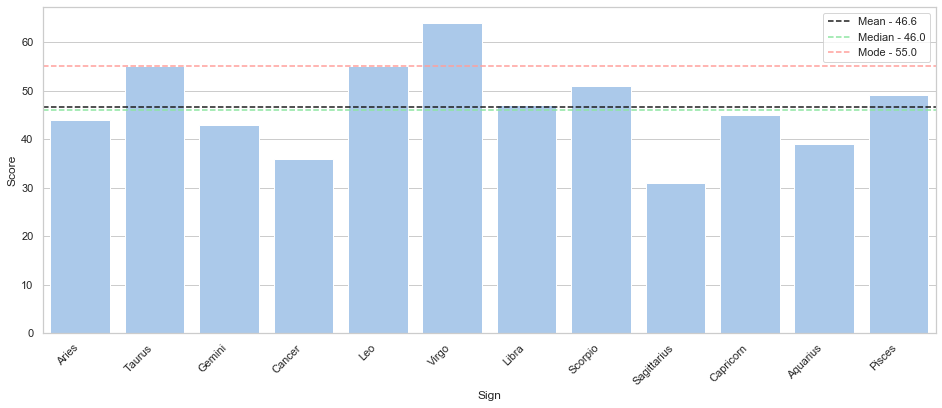

In [15]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='SignLabel', y='SignN', data=sign_data, color="b", ci=None)
ax.set_xticklabels(sign_data['SignLabel'], rotation = 45, ha="right")

mean=sign_data['SignN'].mean()
ax.axhline(mean, color='k', linestyle='--')

median=sign_data['SignN'].median()
ax.axhline(median, color='g', linestyle='--')

mode=sign_data['SignN'].mode().to_numpy()[0]
ax.axhline(mode, color='r', linestyle='--')

plt.legend({f'Mean - {mean:.1f}':mean,f'Median - {median:.1f}':median,f'Mode - {mode:.1f}':mode})

ax.set_xlabel('Sign')
ax.set_ylabel('Score')

### Distribution of zodiac sign among astronaut by gender

In [16]:
sign_data_gender=astro_data.groupby(['SignLabel','sex_or_genderLabel'], sort=False).count().reset_index()

sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Aries','Sign']=1
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Taurus','Sign']=2
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Gemini','Sign']=3
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Cancer','Sign']=4
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Leo','Sign']=5
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Virgo','Sign']=6
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Libra','Sign']=7
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Scorpio','Sign']=8
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Sagittarius','Sign']=9
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Capricorn','Sign']=10
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Aquarius','Sign']=11
sign_data_gender.loc[sign_data_gender['SignLabel'] == 'Pisces','Sign']=12

sign_data_gender.sort_values("Sign", axis = 0, ascending = True, inplace = True, na_position ='last')

sign_data_gender

,SignLabel,sex_or_genderLabel,Surname,Given names,Nation,Flights,time_in_space,birth,death,age,Day,Month,Year,SignN,Sign
18,Aries,female,4,4,4,4,4,4,1,1,4,4,4,4,1.0
6,Aries,male,40,40,40,40,40,40,8,8,40,40,40,40,1.0
3,Taurus,male,46,46,46,46,46,46,4,4,46,46,46,46,2.0
17,Taurus,female,9,9,9,9,9,9,0,0,9,9,9,9,2.0
0,Gemini,male,38,38,38,38,38,38,10,10,38,38,38,38,3.0
16,Gemini,female,5,5,5,5,5,5,1,1,5,5,5,5,3.0
23,Cancer,female,3,3,3,3,3,3,0,0,3,3,3,3,4.0
11,Cancer,male,33,33,33,33,33,33,10,10,33,33,33,33,4.0
19,Leo,female,4,4,4,4,4,4,0,0,4,4,4,4,5.0
9,Leo,male,51,51,51,51,51,51,8,8,51,51,51,51,5.0


Text(0, 0.5, 'Score')

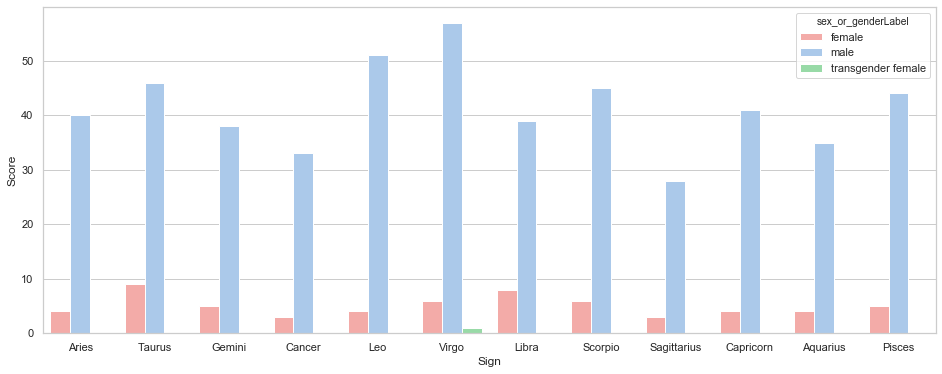

In [17]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='SignLabel', y='SignN', hue='sex_or_genderLabel', data=sign_data_gender, palette=["r", "b", "g"], ci=None)

ax.set_xlabel('Sign')
ax.set_ylabel('Score')

In [38]:
sign_data_time=astro_data.groupby('SignLabel')['time_in_space',].sum().reset_index()
sign_data_time.sort_values("time_in_space", axis = 0, ascending = False, inplace = True, na_position ='last')
sign_data_time

,SignLabel,time_in_space
3,Capricorn,11497279
1,Aries,8701294
7,Pisces,8085418
10,Taurus,8017883
5,Leo,7254735
11,Virgo,7207470
4,Gemini,6835719
9,Scorpio,5936253
0,Aquarius,4509519
6,Libra,4482579


Text(0, 0.5, 'Time in space (s)')

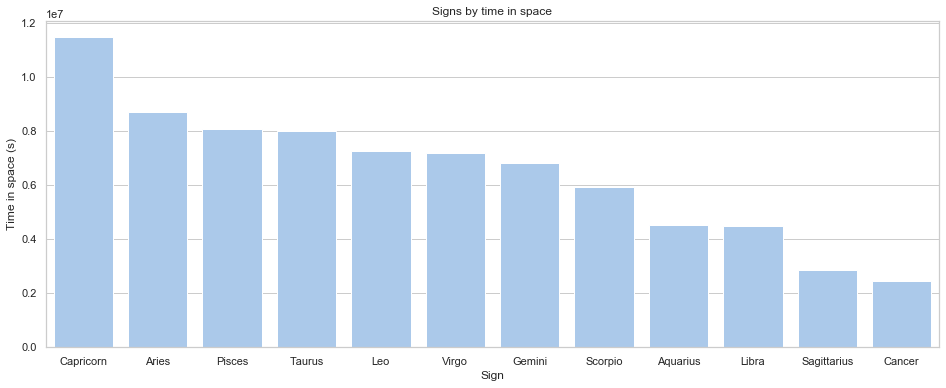

In [40]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='SignLabel', y='time_in_space', data=sign_data_time, color="b", ci=None)

ax.set_title('Signs by time in space')
ax.set_xlabel('Signs')
ax.set_ylabel('Time in space (s)')

In [48]:
sign_data_flights=astro_data.groupby('SignLabel')['Flights'].sum().reset_index()
sign_data_flights.sort_values("Flights", axis = 0, ascending = False, inplace = True, na_position ='last')
sign_data_flights

,SignLabel,Flights
11,Virgo,144
5,Leo,132
10,Taurus,125
3,Capricorn,120
9,Scorpio,119
7,Pisces,114
6,Libra,101
1,Aries,98
4,Gemini,90
2,Cancer,80


Text(0, 0.5, 'Flights')

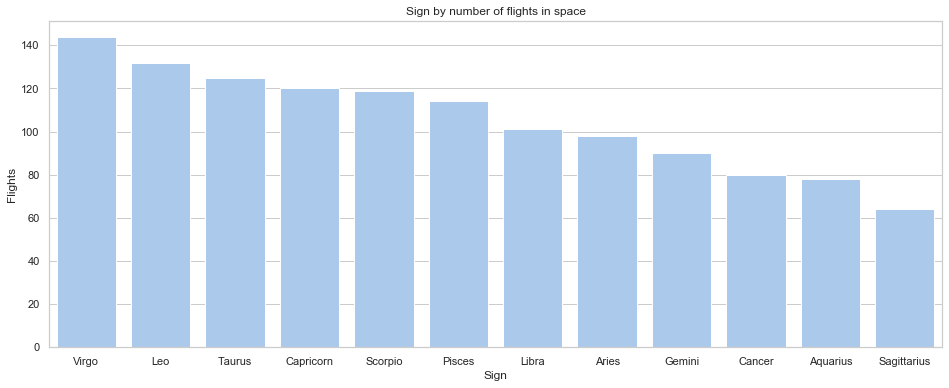

In [44]:
f, ax = plt.subplots(figsize=(16, 6))

ax = sns.barplot(x='SignLabel', y='Flights', data=sign_data_flights, color="b", ci=None)

ax.set_title('Signs by number of flights in space')
ax.set_xlabel('Signs')
ax.set_ylabel('Flights')